# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, plot_confusion_matrix

# Data Extraction

In [2]:
data_set = pd.read_csv('Pendapatan.csv')
data_set.head()

,id,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,Gaji
0,27247,59,Pemerintah Negara,139616,Master,14,Menikah,Ekesekutif Managerial,Laki2,0.0,0.0,50.0,1
1,1640,52,Wiraswasta,158993,SMA,9,Cerai,Servis Lainnya,Perempuan,0.0,0.0,38.0,0
2,45206,52,Pekerja Bebas Bukan Perusahan,284648,SMA,9,Cerai,Ekesekutif Managerial,Perempuan,0.0,0.0,99.0,1
3,16154,45,Wiraswasta,132847,SMA,9,Belum Pernah Menikah,Pembersih,Perempuan,0.0,0.0,40.0,0
4,43023,28,Wiraswasta,103432,SMA,9,Belum Pernah Menikah,Supir,Laki2,0.0,0.0,45.0,1


In [3]:
data_test = pd.read_csv('Pendapatan_test.csv')
data_test.head()

,id,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu
0,47933,30,Pemerintah Lokal,99761,D4,11,Cerai,Pemuka Agama,Perempuan,0.0,0.0,40.0
1,44213,28,Wiraswasta,202206,SMA,9,Menikah,Mesin Inspeksi,Laki2,0.0,0.0,50.0
2,20823,34,Pemerintah Provinsi,199934,Pendidikan Tinggi,10,Menikah,Pemuka Agama,Laki2,0.0,0.0,40.0
3,40565,51,Wiraswasta,373448,Pendidikan Tinggi,10,Menikah,Ekesekutif Managerial,Laki2,0.0,28028000.0,40.0
4,9860,20,?,144685,Pendidikan Tinggi,10,Belum Pernah Menikah,?,Perempuan,0.0,22428000.0,40.0


# EDA

In [4]:
data_set.shape

(38393, 13)

In [5]:
data_set.describe()

,id,Umur,Berat Akhir,Jmlh Tahun Pendidikan,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,Gaji
count,38393.000000,38393.000000,3.839300e+04,38393.000000,3.839300e+04,3.839300e+04,38393.000000,38393.000000
mean,24015.248535,38.673925,1.897238e+05,10.082828,1.518659e+07,1.212665e+06,40.440627,0.239497
std,13872.059919,13.694678,1.055764e+05,2.574543,1.044373e+08,5.613945e+06,12.382695,0.426782
min,0.000000,17.000000,1.228500e+04,1.000000,0.000000e+00,0.000000e+00,1.000000,0.000000
25%,11989.000000,28.000000,1.177510e+05,9.000000,0.000000e+00,0.000000e+00,40.000000,0.000000
50%,24050.000000,37.000000,1.783850e+05,10.000000,0.000000e+00,0.000000e+00,40.000000,0.000000
75%,36031.000000,48.000000,2.376300e+05,12.000000,0.000000e+00,0.000000e+00,45.000000,0.000000
max,47991.000000,90.000000,1.490400e+06,16.000000,1.399986e+09,6.098400e+07,99.000000,1.000000


In [6]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38393 entries, 0 to 38392
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     38393 non-null  int64  
 1   Umur                   38393 non-null  int64  
 2   Kelas Pekerja          38393 non-null  object 
 3   Berat Akhir            38393 non-null  int64  
 4   Pendidikan             38393 non-null  object 
 5   Jmlh Tahun Pendidikan  38393 non-null  int64  
 6   Status Perkawinan      38393 non-null  object 
 7   Pekerjaan              38393 non-null  object 
 8   Jenis Kelamin          38393 non-null  object 
 9   Keuntungan Kapital     38393 non-null  float64
 10  Kerugian Capital       38393 non-null  float64
 11  Jam per Minggu         38393 non-null  float64
 12  Gaji                   38393 non-null  int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 3.8+ MB


In [7]:
data_set['Kelas Pekerja'].value_counts()

Wiraswasta                       26589
Pekerja Bebas Bukan Perusahan     3072
Pemerintah Lokal                  2454
?                                 2204
Pemerintah Negara                 1579
Pekerja Bebas Perusahaan          1345
Pemerintah Provinsi               1128
Tanpa di Bayar                      16
Tidak Pernah Bekerja                 6
Name: Kelas Pekerja, dtype: int64

# Feature Engineering

In [8]:
# menghapus kolom id pada data_set dan data_test
data_set.drop(['id'], axis='columns', inplace=True)
data_test.drop(['id'], axis='columns', inplace=True)

data_set

,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,Gaji
0,59,Pemerintah Negara,139616,Master,14,Menikah,Ekesekutif Managerial,Laki2,0.0,0.0,50.0,1
1,52,Wiraswasta,158993,SMA,9,Cerai,Servis Lainnya,Perempuan,0.0,0.0,38.0,0
2,52,Pekerja Bebas Bukan Perusahan,284648,SMA,9,Cerai,Ekesekutif Managerial,Perempuan,0.0,0.0,99.0,1
3,45,Wiraswasta,132847,SMA,9,Belum Pernah Menikah,Pembersih,Perempuan,0.0,0.0,40.0,0
4,28,Wiraswasta,103432,SMA,9,Belum Pernah Menikah,Supir,Laki2,0.0,0.0,45.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
38388,47,Pekerja Bebas Bukan Perusahan,148169,SMA,9,Menikah,Perbaikan Kerajinan,Laki2,0.0,0.0,40.0,0
38389,69,Pekerja Bebas Perusahaan,264722,D3,12,Menikah,Sales,Laki2,0.0,0.0,40.0,1
38390,24,Pekerja Bebas Bukan Perusahan,31606,Sarjana,13,Menikah,Spesialis,Perempuan,0.0,0.0,20.0,1
38391,47,Wiraswasta,197836,SMA,9,Menikah,Sales,Laki2,0.0,0.0,45.0,0


In [9]:
# beberapa baris mengandung nilai '?' sehingga kita harus mengganti dengan nilai nan 
data_set.replace('?', np.nan, inplace=True)
data_test.replace('?', np.nan, inplace=True)

In [10]:
data_set.isnull().sum()

Umur                        0
Kelas Pekerja            2204
Berat Akhir                 0
Pendidikan                  0
Jmlh Tahun Pendidikan       0
Status Perkawinan           0
Pekerjaan                2210
Jenis Kelamin               0
Keuntungan Kapital          0
Kerugian Capital            0
Jam per Minggu              0
Gaji                        0
dtype: int64

In [11]:
# menghapus baris yang mengandung nilai null
data_set.dropna(inplace=True)
data_test.dropna(inplace=True)

data_set

,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,Gaji
0,59,Pemerintah Negara,139616,Master,14,Menikah,Ekesekutif Managerial,Laki2,0.0,0.0,50.0,1
1,52,Wiraswasta,158993,SMA,9,Cerai,Servis Lainnya,Perempuan,0.0,0.0,38.0,0
2,52,Pekerja Bebas Bukan Perusahan,284648,SMA,9,Cerai,Ekesekutif Managerial,Perempuan,0.0,0.0,99.0,1
3,45,Wiraswasta,132847,SMA,9,Belum Pernah Menikah,Pembersih,Perempuan,0.0,0.0,40.0,0
4,28,Wiraswasta,103432,SMA,9,Belum Pernah Menikah,Supir,Laki2,0.0,0.0,45.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
38388,47,Pekerja Bebas Bukan Perusahan,148169,SMA,9,Menikah,Perbaikan Kerajinan,Laki2,0.0,0.0,40.0,0
38389,69,Pekerja Bebas Perusahaan,264722,D3,12,Menikah,Sales,Laki2,0.0,0.0,40.0,1
38390,24,Pekerja Bebas Bukan Perusahan,31606,Sarjana,13,Menikah,Spesialis,Perempuan,0.0,0.0,20.0,1
38391,47,Wiraswasta,197836,SMA,9,Menikah,Sales,Laki2,0.0,0.0,45.0,0


In [12]:
# fungsi mengubah variabel kategorik menjadi variabel dummies
def Encode(x):
    for i in x.select_dtypes(include=['object']).axes[1]:
        x = pd.concat([x, pd.get_dummies(x[i], prefix=i, prefix_sep=' : ')], axis='columns')
        x.drop(i, axis='columns', inplace=True)
    return x

In [13]:
data_set = Encode(data_set)
data_test = Encode(data_test)
data_set

,Umur,Berat Akhir,Jmlh Tahun Pendidikan,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,Gaji,Kelas Pekerja : Pekerja Bebas Bukan Perusahan,Kelas Pekerja : Pekerja Bebas Perusahaan,Kelas Pekerja : Pemerintah Lokal,...,Pekerjaan : Perbaikan Kerajinan,Pekerjaan : Petani,Pekerjaan : Sales,Pekerjaan : Servis Lainnya,Pekerjaan : Spesialis,Pekerjaan : Supir,Pekerjaan : Tech-support,Pekerjaan : Tentara,Jenis Kelamin : Laki2,Jenis Kelamin : Perempuan
0,59,139616,14,0.0,0.0,50.0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,52,158993,9,0.0,0.0,38.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,52,284648,9,0.0,0.0,99.0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,45,132847,9,0.0,0.0,40.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,28,103432,9,0.0,0.0,45.0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38388,47,148169,9,0.0,0.0,40.0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
38389,69,264722,12,0.0,0.0,40.0,1,0,1,0,...,0,0,1,0,0,0,0,0,1,0
38390,24,31606,13,0.0,0.0,20.0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,1
38391,47,197836,9,0.0,0.0,45.0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [14]:
# memisahkan data_set kedalam features dan target
x = data_set.drop(['Gaji'], axis='columns')
y = data_set['Gaji']

In [15]:
# melakukan standarisasi data
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

# Modelling Data

In [16]:
# membagi data_set ke dalam data train dan test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [17]:
# memodelkan data menggunakan RandomForestClassifier
model = RandomForestClassifier(n_estimators=20).fit(x_train, y_train)
# model.score(x_test, y_test)

In [18]:
predictions = model.predict(x_test)

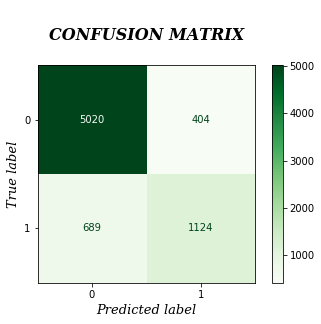

In [19]:
# plot confusion matriks
plot_confusion_matrix(model, x_test, y_test,
                    cmap=plt.cm.Greens,
                    values_format='.4g')

plt.title('\nCONFUSION MATRIX\n', size=16, weight='bold', style='oblique', family='serif')
plt.ylabel('True label', size=13, weight='medium', style='oblique', family='serif')
plt.xlabel('Predicted label', size=13, weight='medium', style='oblique', family='serif')
plt.show()

In [20]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      5424
           1       0.74      0.62      0.67      1813

    accuracy                           0.85      7237
   macro avg       0.81      0.77      0.79      7237
weighted avg       0.84      0.85      0.84      7237



In [21]:
# melakukan prediksi Gaji berdasarkan data test
Gaji = model.predict(data_test)
Gaji[:40]

array([0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0], dtype=int64)